# Multiclass Classification 


**Load liabraries and data**

In [ ]:
import numpy as np
import scipy.io as sio
import scipy.optimize as opt

data = sio.loadmat ('drive/MyDrive/Colab Notebooks/Data/Ex3/ex3data1.mat')
x = data['X']
m, n = x.shape 
y = np.squeeze (data['y']).reshape (m, 1)
np.place (y, y == 10,0)
numExamples = x.shape [0]
numFeatures = x.shape [1]
numLabels = 10


In [ ]:
x.shape, y.shape

((5000, 400), (5000, 1))

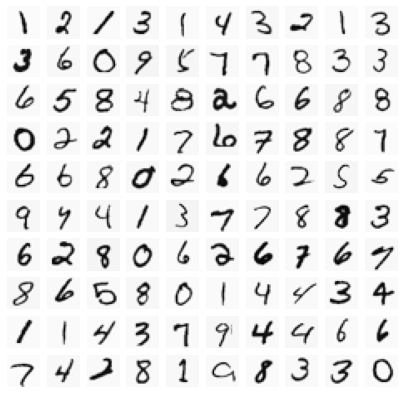

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

fig, axis = plt.subplots (10, 10, figsize = (7, 7))
for i in range (10):
    for j in range (10):
        axis [i, j].imshow (x[np.random.randint (0, 5001),:].reshape(20, 20, order = 'F'), cmap = 'Greys')
        # reshape back to 20x20 pixel, order = 'F' to make sure that the figure is on upright vertical direction
        axis [i, j].axis ('off')

**Input functions**

In [ ]:
# Sigmoid function
def sigmoid (z):
    g = 1/ (1 + np.exp(-z))
    return g

# Cost function
def cost (theta, X, y, lambda_):
    m, n = X.shape
    hx = sigmoid (X.dot (theta))
    J =  1.0 / m * (np.sum(-y.T.dot(np.log(hx)) - (1 - y.T).dot(np.log(1 - hx)))) + (lambda_ * np.sum(theta [1:]**2)/(2.0*m))
    return J

# Gradient function
def gradient (theta, X, y, lambda_):
    m, n = X.shape
    grad = np.zeros (np.shape (theta))
    err = sigmoid (X.dot(theta)) - y
    grad [0] = (1.0/m) * (X[:,0].T @ err)
    grad [1:] = (1.0/m) * (X[:,1:].T @ err) + ((lambda_/m) * theta[1:,])
    grad = np.ndarray.flatten (grad)
    return grad


Test function with given data


In [ ]:
theta_test = np.array ([-2, -1, 1, 2]).reshape (4, 1)
X_test = np.array ([np.linspace (0.1, 1.5, 15)]).reshape (3, 5).T
X_test = np.hstack ((np.ones ((5, 1)), X_test))
y_test = np.array ([1, 0, 1, 0, 1]).reshape (5, 1)
lambda_ = 3

J = cost (theta_test, X_test, y_test, lambda_)
grad = gradient (theta_test, X_test, y_test, lambda_)
print ('Cost =', J.round (6), '\nGradient =', grad.round(6))

Cost = 2.534819 
Gradient = [ 0.146561 -0.548558  0.724722  1.398003]


In [ ]:
def gradientDescent (theta, X, y, alpha, num_iters, lambda_):
    '''
    Take in X, y, alpha (learning_rate), num_iters (numbers of iterations) & lambda
    This will return Gradient corresponding with J value after each iteration. 
    '''
    m, n = X.shape
    grad_history = []
    J_history = []
    theta = theta.reshape (-1, 1)
    for iter in range (num_iters):
        J = cost (theta, X, y, lambda_)
        grad = gradient (theta, X, y, lambda_).reshape (-1, 1)
        theta = theta - (alpha * grad)
        J_history.append (J)
        grad_history.append (grad)
    return J_history, theta

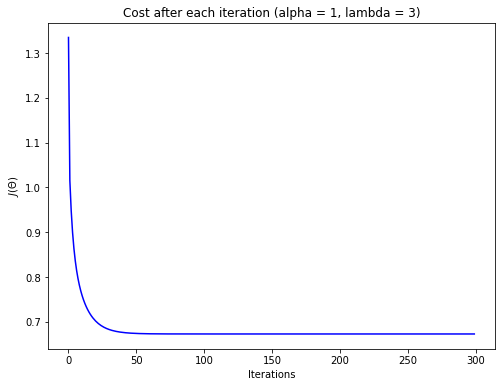

In [ ]:
J_history, theta = gradientDescent (theta_test, X_test, y_test, alpha = 1.0, num_iters = 300, lambda_ = 1)

import warnings
plt.figure (figsize = (8, 6))
plt.plot (J_history, c = 'b')
plt.xlabel ('Iterations')
plt.ylabel ('$J(\Theta)$')
plt.title ('Cost after each iteration (alpha = 1, lambda = 3)')

warnings.filterwarnings ('ignore')

In [ ]:
def one_vs_all (X, y, num_labels, Lambda):
    m, n = X.shape
    y = y.reshape (m,)
    all_theta = np.zeros ((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis = 1)
    for i in np.arange (num_labels):
        initial_theta = np.zeros (n + 1)
        # options = {'maxiter': 100}
        # res = opt.minimize (lrCostFunction, initial_theta, (X, np.where(y == i, 1, 0), Lambda), method = 'CG', jac = True, options = options)
        # all_theta[i] = res.x

        all_theta[i] = opt.fmin_cg (f = cost, fprime = gradient, x0 = initial_theta, args = (X, (y == i)*1, Lambda))

    return all_theta

In [ ]:
def predict_one_vs_all (all_theta, X):
    m = X.shape [0]
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    predictions = sigmoid (X.dot(all_theta.T))
    return np.argmax (predictions, axis = 1)

In [ ]:
all_theta = one_vs_all (x, y, num_labels = 10, Lambda = 0.1)
pred = predict_one_vs_all (all_theta, x)

Optimization terminated successfully.
         Current function value: 0.008574
         Iterations: 110
         Function evaluations: 426
         Gradient evaluations: 426
Optimization terminated successfully.
         Current function value: 0.013128
         Iterations: 100
         Function evaluations: 388
         Gradient evaluations: 388
Optimization terminated successfully.
         Current function value: 0.050812
         Iterations: 215
         Function evaluations: 661
         Gradient evaluations: 661
Optimization terminated successfully.
         Current function value: 0.057607
         Iterations: 223
         Function evaluations: 660
         Gradient evaluations: 660
Optimization terminated successfully.
         Current function value: 0.033112
         Iterations: 200
         Function evaluations: 663
         Gradient evaluations: 663
Optimization terminated successfully.
         Current function value: 0.054460
         Iterations: 243
         Function ev

In [ ]:
print ('Training test accuracy:', (np.mean(pred == y.flatten()))* 100, '%')


Training test accuracy: 97.52 %


Hmm... I think it is 8


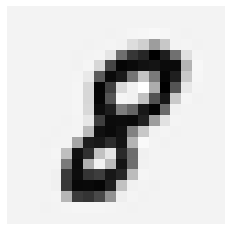

In [ ]:
x_check = x[np.random.randint(0, 5001),:].reshape (1, -1)
print ('Hmm... I think it is', int(predict_one_vs_all (all_theta, x_check)))
plt.imshow (x_check.reshape (20, 20, order = 'F'), cmap = 'Greys')
plt.axis ('off')
warnings.filterwarnings ('ignore')

# Neural network


In [ ]:
# Set up parameters
input_layer_numbers = 400 
hidden_layer_numbers = 25
label_numbers = 10

weights = sio.loadmat ('drive/MyDrive/Colab Notebooks/Data/Ex3/ex3weights.mat')
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# Swap first & last columns of Theta 2 due to Matlab indexing
Theta2 = np.roll (Theta2, 1, axis = 0)

In [ ]:
Theta1.shape

(25, 401)

**Feedforward propagation and Prediction**

In [ ]:
def NN_predict (Theta1, Theta2, X):
    # To make sure that X input has 2 dimensions
    if X.ndim == 1:
        X = X[None]
    
    m = X.shape [0]
    num_labels = Theta2.shape[0]
    p = np.zeros (X.shape[0]) # Shape our prediction value correctly (5000, 1)

    X = np.concatenate([np.ones((m, 1)), X], axis = 1)

    a2 = sigmoid (X.dot(Theta1.T))
    a2 = np.concatenate ([np.ones((a2.shape[0], 1)), a2], axis = 1)

    p = np.argmax (sigmoid(a2.dot(Theta2.T)), axis = 1)
    return p

In [ ]:
pred = NN_predict (Theta1, Theta2, x)
print ('Training set accuracy:', np.mean (pred == y.flatten())*100, '%')

Training set accuracy: 97.52 %


Hmm... Neural Networks think it is [2]


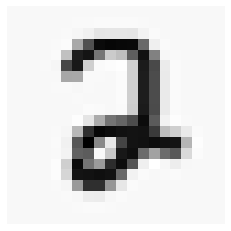

In [ ]:
x_check = x[np.random.randint(0, 5001),:].reshape (1, -1)
print ('Hmm... Neural Networks think it is', int(NN_predict (Theta1, Theta2, x_check)))
plt.imshow (x_check.reshape (20, 20, order = 'F'), cmap = 'Greys')
plt.axis ('off')
warnings.filterwarnings ('ignore')